In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

from scripts.pipeline import Pipeline

2024-03-26 23:52:00.352376: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-26 23:52:00.373292: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 23:52:00.373314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 23:52:00.373852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-26 23:52:00.377440: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#use gpu for tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2024-03-26 23:52:01.261761: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-26 23:52:01.265021: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-26 23:52:01.265053: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
# Load the data
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

# split train data into predictors and response
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice'] 

#combine the data for preprocessing
data = pd.concat([X, test_data], axis=0)
# Preprocess the data
data = Pipeline(data)

# Split the data back into train and test, processed
X = data[:len(train_data)]
test = data[len(train_data):]
#increase test index by 1
test.index = test.index + 1

# Split the data into features and response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# try a few models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

models = [
    LinearRegression(),
    RandomForestRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    HistGradientBoostingRegressor(),
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model.__class__.__name__} MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'{model.__class__.__name__} R^2: {model.score(X_test, y_test)}')


LinearRegression MSE: 5.401053165269924e+34
LinearRegression R^2: -7.041490830219341e+24
RandomForestRegressor MSE: 848303943.3586905
RandomForestRegressor R^2: 0.8894044502874172
SVR MSE: 7858659144.939162
SVR R^2: -0.024553445663832107
GradientBoostingRegressor MSE: 742905824.9417056
GradientBoostingRegressor R^2: 0.9031454719297858
AdaBoostRegressor MSE: 1276963960.9349034
AdaBoostRegressor R^2: 0.8335189499843718
BaggingRegressor MSE: 1026556179.3085959
BaggingRegressor R^2: 0.8661652514404525
ExtraTreesRegressor MSE: 829888658.9413068
ExtraTreesRegressor R^2: 0.8918052979071871
HistGradientBoostingRegressor MSE: 857279866.6666343
HistGradientBoostingRegressor R^2: 0.8882342362618998


In [5]:
# build nn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

2024-03-26 23:52:05.761095: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-26 23:52:05.761145: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-26 23:52:05.761165: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-26 23:52:05.843845: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-26 23:52:05.843887: I external/local_xla/xla/stream_executor

Epoch 1/1000


2024-03-26 23:52:06.407202: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3f71f6fa00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-26 23:52:06.407225: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-03-26 23:52:06.410273: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-26 23:52:06.419395: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1711497126.457762   94867 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 [==============================] - 1s 4ms/step - loss: 38885306368.0000 - val_loss: 39653486592.0000
Epoch 2/1000
37/37 [==============================] - 0s 2ms/step - loss: 38884700160.0000 - val_loss: 39652683776.0000
Epoch 3/1000
37/37 [==============================] - 0s 2ms/step - loss: 38883627008.0000 - val_loss: 39651209216.0000
Epoch 4/1000
37/37 [==============================] - 0s 2ms/step - loss: 38881746944.0000 - val_loss: 39648759808.0000
Epoch 5/1000
37/37 [==============================] - 0s 2ms/step - loss: 38878765056.0000 - val_loss: 39644934144.0000
Epoch 6/1000
37/37 [==============================] - 0s 2ms/step - loss: 38874427392.0000 - val_loss: 39639625728.0000
Epoch 7/1000
37/37 [==============================] - 0s 2ms/step - loss: 38868414464.0000 - val_loss: 39632621568.0000
Epoch 8/1000
37/37 [==============================] - 0s 2ms/step - loss: 38860509184.0000 - val_loss: 39623311360.0000
Epoch 9/1000
37/37 [==============================] -

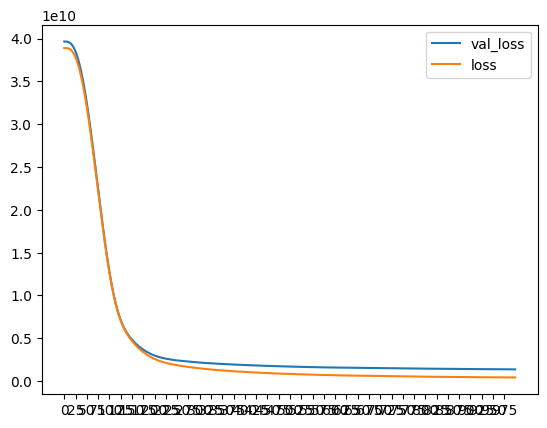

In [6]:
#train the model, graph the loss
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
#add ticks every 25 epochs
plt.xticks(range(0, 1000, 25))
plt.legend()
plt.show()
# about 275 epochs is plenty